---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Fake News Detection
This project uses a Fake and real news dataset from the Kaggle.  We implement a Feed Forward Neural Network and a LSTM techniques using TensorFlow to find the desired output for the project.

### Project Repo 
https://github.com/nayemmajhar/fake-news-detection

## Participants: Farjana Islam, Junaid Abbas Mohammed, Md Majharul Islam Nayem
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester: Deep Learning from Scratch and SoSe2021
Add here in which course and in which semester it was done.

### License: GNU General Public License v3.0
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

In [259]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading

In [260]:
fake_news = pd.read_csv('./data/Fake.csv')
true_news = pd.read_csv('./data/True.csv')

fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [261]:
# label the dataset
fake_news['label'] = 0
true_news['label'] = 1

# concat two dataset
df = pd.concat([fake_news,true_news])

# Concat title and text
df['text'] = df['title'] + ' ' + df['text']

# reindex dataset
df.reset_index(inplace=True)

df.shape

(44898, 6)

In [262]:
df.head()

,index,title,text,subject,date,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0


<AxesSubplot:xlabel='subject'>

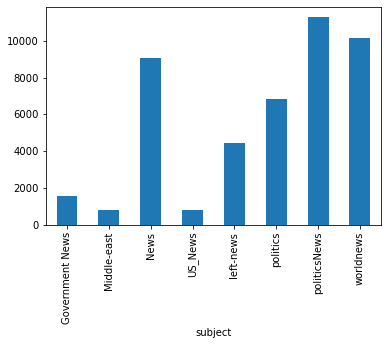

In [263]:
# news categories
df.groupby('subject').label.count().plot.bar()

<AxesSubplot:xlabel='label'>

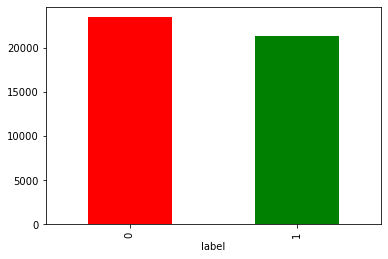

In [264]:
# Number of sample in each class
df.groupby('label').label.count().plot.bar(color=['r','g'])

In [265]:
# drop column: subject, title
del df['subject']
del df['title']

In [266]:
# shuffle dataset
df = df.sample(frac = 1)
df.head()

,index,text,date,label
13906,13906,"BREAKING BOMBSHELL: Blonde Clinton Neighbor, D...","May 13, 2016",0
37773,14292,Rosneft's Sechin to miss hearing at ex-ministe...,"November 21, 2017",1
37564,14083,Turkey to detain 99 suspects in widening post-...,"November 23, 2017",1
39111,15630,France warns of ballistic proliferation after ...,"November 5, 2017",1
14169,14169,WATCH: BLACK LIVES MATTER Bernie Sanders Suppo...,"Apr 4, 2016",0


### Data Preprocessing  

In [267]:
import nltk
import re

In [268]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/nayem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nayem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [269]:
# list of stopwords for english
stopwords = nltk.corpus.stopwords.words("english")

In [270]:
import string
from nltk.tokenize import word_tokenize
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

def delete_punctuation(text):
    chars = []
    for char in text:
        if char not in string.punctuation:
            chars.append(char)
        else:
            chars.append(' ')
    return ''.join(chars)




def cleaning_and_processing_text(txt):
    
    # lower cased the text
    text = re.sub('[^a-zA-Z]',' ',txt)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(' $', '', text)
    text = delete_punctuation(text)
    text = text.lower()
    
    # remove stopwords, Stemming (remove -ing, -ly, ...) and Lemmatisation
    text = text.split()
    clean_text = [lem.lemmatize(word) for word in text if word not in stopwords]
    clean_text = [ps.stem(word) for word in clean_text]
    
    text = " ".join(clean_text)
    
    return text

In [271]:
df['clean_text'] = df['text'].apply(lambda x: cleaning_and_processing_text(x))

In [272]:
df.head()

,index,text,date,label,clean_text
13906,13906,"BREAKING BOMBSHELL: Blonde Clinton Neighbor, D...","May 13, 2016",0,break bombshel blond clinton neighbor dub ener...
37773,14292,Rosneft's Sechin to miss hearing at ex-ministe...,"November 21, 2017",1,rosneft sechin miss hear ex minist corrupt tri...
37564,14083,Turkey to detain 99 suspects in widening post-...,"November 23, 2017",1,turkey detain suspect widen post coup probe an...
39111,15630,France warns of ballistic proliferation after ...,"November 5, 2017",1,franc warn ballist prolifer houthi target riya...
14169,14169,WATCH: BLACK LIVES MATTER Bernie Sanders Suppo...,"Apr 4, 2016",0,watch black life matter berni sander support s...


In [273]:
df['clean_text'][:1].values

array(['break bombshel blond clinton neighbor dub energ get million clinton chariti donald trump react donald trump react friday report clinton global foundat provid million power compani partli own rich blond divorce say peopl whisper possibl romant tie bill clinton long time commit juli tauber mcmahon firm clinton global initi place confer agenda clinton urg wall street journal report thursday initi commit million support work energi pioneer solut compani found deliv energi save commun rural america said statement chariti peopl talk year idea went certainli presumpt gop presidenti nomine said fox friend accord report wall street journal clinton global initi dole million energi pioneer solut partli own juli tauber mcmahon fit blond mother three life minut bill hillari clinton home chappaqua west chester daughter joel tauber millionair donor democrat parti mcmahon rumor woman dub energ secret servic clinton home frequent visit accord radaronlin secret servic agent even given special in

### Text to Vectorize data


In [274]:
# sparse feature matrix from text using TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # params: max_features=500 can be used
vector_df = vectorizer.fit_transform(df['clean_text'])

In [275]:
vector_df.shape

(44898, 89469)

In [309]:
# display 50 features of sparse matrix
print(vectorizer.get_feature_names()[:50])

['aa', 'aaa', 'aaaaaaaand', 'aaaaackkk', 'aaaaapkfhk', 'aaaahhhh', 'aaaand', 'aaaarrgh', 'aaab', 'aaarf', 'aab', 'aaba', 'aabfsv', 'aabg', 'aabo', 'aaccord', 'aachen', 'aacnr', 'aadhaar', 'aadhar', 'aadl', 'aaf', 'aafn', 'aag', 'aagi', 'aagxdwkrjpq', 'aahd', 'aahi', 'aahwuhvvnh', 'aai', 'aaj', 'aaja', 'aal', 'aalberg', 'aalbert', 'aaldef', 'aaliyah', 'aamer', 'aamin', 'aammir', 'aamom', 'aamrrd', 'aan', 'aaofj', 'aaouj', 'aapa', 'aapi', 'aapl', 'aapq', 'aapxim']


In [277]:
# important features using TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=7) # best 1000 features
truncated_x = pd.DataFrame(svd.fit_transform(vector_df))

In [278]:
truncated_x.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.210797,-0.084305,0.007055,-0.081936,0.104061,0.162768,0.045044,0.097901,0.019920,0.086741,...,0.002472,-0.002533,0.002268,0.001158,0.028460,-0.015367,0.004920,-0.008460,0.029138,0.015659
1,0.105323,0.059376,-0.003877,-0.023701,0.067404,-0.041279,0.000833,-0.008642,0.019303,-0.034081,...,0.009054,-0.018876,-0.011487,-0.035451,0.022481,-0.016869,-0.021431,-0.022158,-0.005834,-0.037660
2,0.129242,0.106455,-0.055181,-0.090192,0.027940,-0.041382,-0.007516,-0.014856,-0.001439,-0.000420,...,0.003606,-0.006438,-0.001062,0.001724,0.004697,-0.005695,0.004248,-0.017027,0.015447,0.004794
3,0.063790,0.126330,0.033238,-0.023379,0.004643,-0.010236,0.047131,0.022252,-0.078996,-0.000564,...,0.003842,0.010583,0.000530,-0.019981,-0.004235,-0.029789,-0.018588,-0.001944,0.011909,-0.021528
4,0.168685,-0.086978,0.024366,-0.078021,-0.094415,0.042170,-0.002704,0.008719,-0.030177,-0.062407,...,-0.004697,0.019882,0.006654,-0.003820,0.003976,0.022796,-0.022069,-0.013496,0.010119,0.008948


### Split Dataset

In [297]:
tf_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(truncated_x.values, tf.float32),
            tf.cast(df['label'].values, tf.int32)
        )
    )
)

In [298]:
# method: split dataset - train, validation, test
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [299]:
train_split, valid_split, test_split = get_dataset_partitions_tf(tf_dataset, len(list(tf_dataset)))

In [300]:
# Create min-batch data
train_dataset = train_split.batch(64)
val_dataset = valid_split.batch(64)
test_dataset = test_split.batch(64)

### Model

In [301]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(1000,), input_shape=(1000,)),
    keras.layers.Dense(units=40, activation='relu'),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [302]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 1000)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 40)                40040     
_________________________________________________________________
dense_66 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_67 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_68 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 6         
Total params: 41,131
Trainable params: 41,131
Non-trainable params: 0
_________________________________________________

### Training Model

In [303]:
model.compile(optimizer='SGD', 
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=50, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5239 - val_loss: 0.6747 - val_accuracy: 0.6953
Epoch 2/50
500/500 [==============================] - 0s 958us/step - loss: 0.6699 - accuracy: 0.6491 - val_loss: 0.6219 - val_accuracy: 0.7969
Epoch 3/50
500/500 [==============================] - 0s 967us/step - loss: 0.5953 - accuracy: 0.8311 - val_loss: 0.4208 - val_accuracy: 0.9375
Epoch 4/50
500/500 [==============================] - 0s 939us/step - loss: 0.3535 - accuracy: 0.9195 - val_loss: 0.1680 - val_accuracy: 0.9688
Epoch 5/50
500/500 [==============================] - 0s 966us/step - loss: 0.1633 - accuracy: 0.9521 - val_loss: 0.1006 - val_accuracy: 0.9766
Epoch 6/50
500/500 [==============================] - 0s 987us/step - loss: 0.1029 - accuracy: 0.9701 - val_loss: 0.0757 - val_accuracy: 0.9766
Epoch 7/50
500/500 [==============================] - 0s 950us/step - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.0635 - val_accuracy: 0

<function matplotlib.pyplot.show(close=None, block=None)>

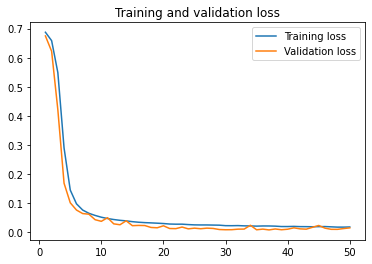

<Figure size 432x288 with 0 Axes>

In [310]:
# training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()
plt.show

### Evaluate Model

In [311]:
result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, result))

71/71 [==============================] - 0s 503us/step - loss: 0.0543 - accuracy: 0.9846


{'loss': 0.0542885884642601, 'accuracy': 0.9846359491348267}